<a href="https://colab.research.google.com/github/k-plasma/CommandAPI/blob/master/DataScientistAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The 1st step in solving this task is extracting the dataset. My first instinct for data is to look towards EU or UN instiutions. https://www.europeandataportal.eu/ was searched. But no such data containing a list of coffee shops from Hungary.

Next I tried the District V official site but no data was available https://www.belvaros-lipotvaros.hu/

The Hungarian Central Statistical Office www.ksh.hu While they have some sort of data, it wasn't what was required for this task.

In the end, I found the www.ittlakunk.hu which is a platform that lists economic/hman activities for each district of Budapest. By appending the respective district to the beginning of the link, one can narrow down to the district itself. 

For the 5th District: https://5.kerulet.ittlakunk.hu/
For the 12th District: https://12.kerulet.ittlakunk.hu/

I now have the list of coffee stores, restaurants and bakeries for each district. But in raw form. There was no well prepared .csv file waiting to be downloaded. I manually went through each listing and if they offered coffee, I save the name and address in .ods spread sheet I created locally. I also used Google Maps to get the exact coordinates (latitude and longitude) for each coffee store. These coordinates will be super useful to complete the task.

Now, I have a spreadsheet with 2 tabs. One for each district. This spreadsheet was then uploaded to my Google Drive, opened in Google sheets to enable me perform the next steps below. 


In [1]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())


Authentication required to interact with Google Sheet. Click link while cell above runs, copy paste. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
workbook = gc.open_by_url('https://docs.google.com/spreadsheets/d/10Nt1lhvvE6bQ5VXIzKLNigz98aZJrBQe1KmL_kcRr7A/edit#gid=349858694')

In [4]:
sheetDistrict5 = workbook.worksheet('District5')
sheetDistrict12 = workbook.worksheet('District12')

In [5]:
dataDistrict5 = sheetDistrict5.get_all_values()
dataDistrict12 = sheetDistrict12.get_all_values()

In [6]:
# The data bove is a matrix. Put in a Pandas DataFrame. Use the first rows as the column names.
dfDistrict5 = pd.DataFrame(dataDistrict5)
dfDistrict5.columns = dfDistrict5.iloc[0]
dfDistrict5 = dfDistrict5.iloc[1:]

In [7]:
dfDistrict5.head()

,Name,Address,latitude,longitude
1,Párisi Passage Café & Brasserie,Ferenciek tere 10,47.69881,19.16822
2,"Napfényes Étterem, Cukrászda és Rendezvényterem",Ferenciek tere 2,47.69757,19.16417
3,Auguszt Cukrászda – Belváros,Kossuth Lajos u. 14-16,47.69914,19.16822
4,Nabu Cafe Shop & Bar - Belvárosi Piac,Hold u. 13,47.69929,19.16299
5,Empathy Cafe & Bistro,Arany János u. 31,47.70176,19.16673


In [8]:
dfDistrict12 = pd.DataFrame(dataDistrict12)
dfDistrict12.columns = dfDistrict12.iloc[0]
dfDistrict12 = dfDistrict12.iloc[1:]

In [9]:
dfDistrict12.head()

,Name,Address,latitude,longitude
1,Normafa Delikát,\nEotvos út 47-53,47.69097,18.57398
2,Budai 3,Kiss János altábornagy u. 35,47.49611,19.03972
3,Pataki Cuki - Hegyvidék Bevásárlóközpont,Apor Vilmos tér 11-12.,47.69506,19.15374
4,Kilátó Kávézó,Erzsébet kilátó út,47.69546,18.55853
5,Villa Bagatelle Brót Pékség és Bisztró,Németvölgyi út 17,47.69929,19.14974


Data Transformation: Due to a flaw in the gspread library, the above DataFrames are in string format. This includes the latitude and longitude columns which were originally numerical. Check:

In [10]:
dfDistrict12.iloc[1][3]


'19.03972'

In [11]:
type(dfDistrict12.iloc[1][3])

str

In [12]:
# Create new DataFrames and assign the type with astype() function.

new_dfDistrict5_schema = {
'Coffee Place': dfDistrict5['Name'].astype(str),
'Address': dfDistrict5['Address'].astype(str),
'Latitude': dfDistrict5['latitude'].astype(float),
'Longitude': dfDistrict5['longitude'].astype(float)
}

In [13]:
new_dfDistrict12_schema = {
'Coffee Place': dfDistrict12['Name'].astype(str),
'Address': dfDistrict12['Address'].astype(str),
'Latitude': dfDistrict12['latitude'].astype(float),
'Longitude': dfDistrict12['longitude'].astype(float)
}

In [14]:
dfDistrict5 = pd.DataFrame(new_dfDistrict5_schema)
dfDistrict12 = pd.DataFrame(new_dfDistrict12_schema)

In [15]:
dfDistrict5.head()

,Coffee Place,Address,Latitude,Longitude
1,Párisi Passage Café & Brasserie,Ferenciek tere 10,47.69881,19.16822
2,"Napfényes Étterem, Cukrászda és Rendezvényterem",Ferenciek tere 2,47.69757,19.16417
3,Auguszt Cukrászda – Belváros,Kossuth Lajos u. 14-16,47.69914,19.16822
4,Nabu Cafe Shop & Bar - Belvárosi Piac,Hold u. 13,47.69929,19.16299
5,Empathy Cafe & Bistro,Arany János u. 31,47.70176,19.16673


In [16]:
dfDistrict12.head()

,Coffee Place,Address,Latitude,Longitude
1,Normafa Delikát,\nEotvos út 47-53,47.69097,18.57398
2,Budai 3,Kiss János altábornagy u. 35,47.49611,19.03972
3,Pataki Cuki - Hegyvidék Bevásárlóközpont,Apor Vilmos tér 11-12.,47.69506,19.15374
4,Kilátó Kávézó,Erzsébet kilátó út,47.69546,18.55853
5,Villa Bagatelle Brót Pékség és Bisztró,Németvölgyi út 17,47.69929,19.14974


In [17]:
dfDistrict12.iloc[1][3]

19.03972

In [18]:
type(dfDistrict12.iloc[1][3])

numpy.float64

In [19]:
# The most popular location for Coffee Shops in the District 5

dfDistrict5['Address'].describe()

count             59
unique            55
top       Hold u. 13
freq               3
Name: Address, dtype: object

District V is the heart of Budapest and the political, financial, commercial and touristic center of Hungary. The name of the district is Belváros-Lipótváros, which refers to the two historical neighbourhoods that is located in the district; Belváros and Lipótváros. source: Wikipedia


Area: 2.59 km²  count above = 59 coffee shops in this total area. 

In [20]:
import math

In [21]:
# In particular, first, measure the number of cafes per square kilometer  in District 5 in Budapest!


district5TotalArea = 2.59
district5CoffeShops = 59
district5ShopsPerKm = district5CoffeShops / district5TotalArea

print(f"There are: {math.ceil(district5ShopsPerKm)} Coffee shops in District 5 per km²")

There are: 23 Coffee shops in District 5 per km²


In [22]:
# The most popular location for Coffee Shops in the District 12

dfDistrict12['Address'].describe()

count                36
unique               30
top       Alkotás u. 53
freq                  6
Name: Address, dtype: object

Hegyvidék is the official name of the XII district of Budapest, capital of Hungary. It is a region of Buda, on the west bank of river Danube. Wikipedia


Area: 26.67 km²    count = 36

In [23]:
# How about District 12?


district12TotalArea = 26.67
district12CoffeeShops = 36
district12ShopsPerKm = district12CoffeeShops / district12TotalArea

print(f"There are: {math.ceil(district12ShopsPerKm)} Coffee shops in District 12 per km²")

There are: 2 Coffee shops in District 12 per km²


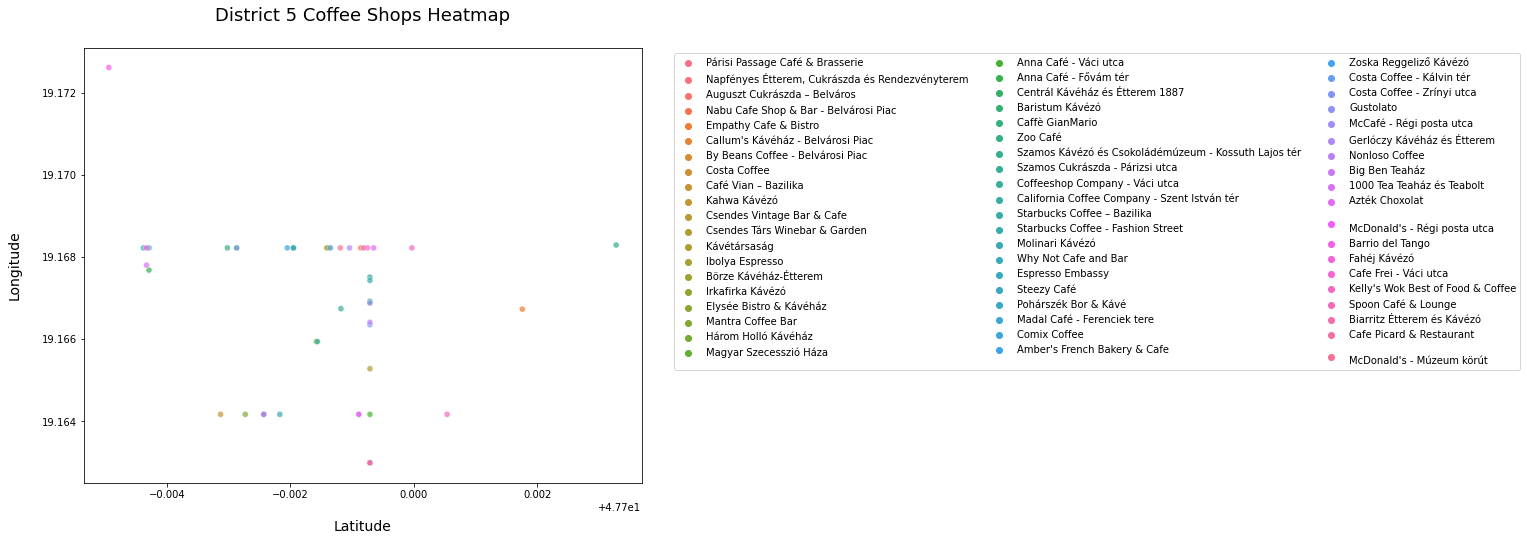

In [24]:
# Visualing the Density of Coffee Shops in District 5

import seaborn as sns

plt.figure(figsize=(10,8))
sns.scatterplot(x=dfDistrict5['Latitude'],
               y=dfDistrict5['Longitude'],
                hue=dfDistrict5['Coffee Place'],
                alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=3)
plt.title('District 5 Coffee Shops Heatmap\n', fontsize=18)
plt.ylabel('Longitude\n', fontsize=14)
plt.xlabel('\nLatitude', fontsize=14)
plt.show()

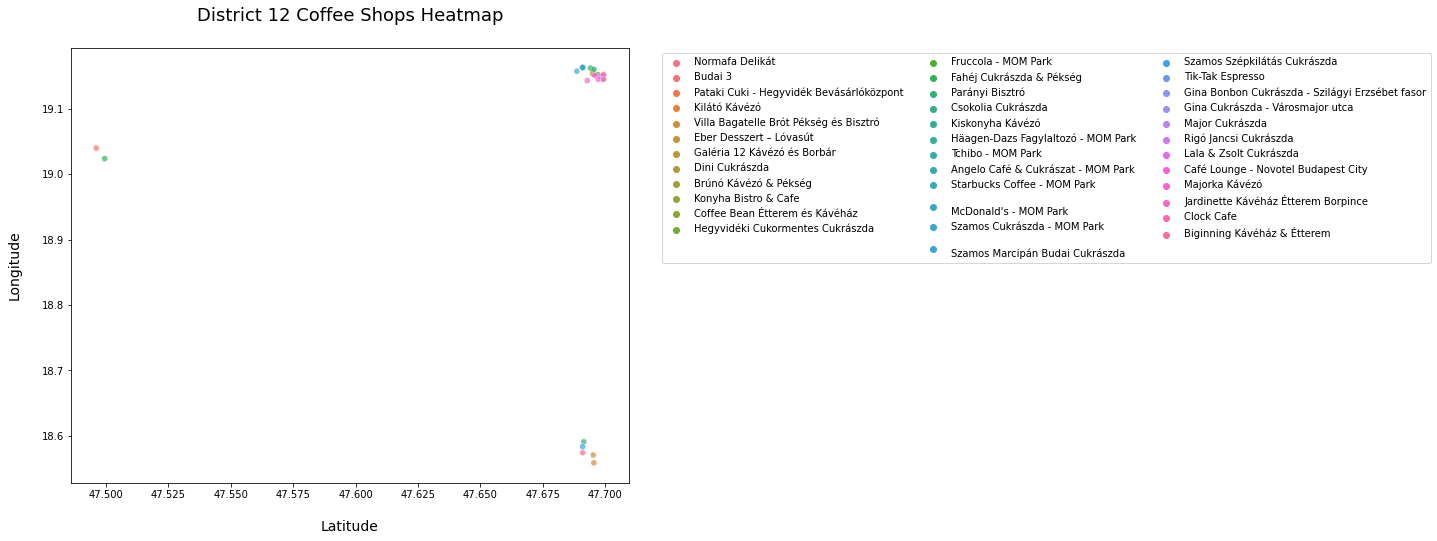

In [25]:
# Visualing the Density of Coffee Shops in District 12

import seaborn as sns

plt.figure(figsize=(10,8))
sns.scatterplot(x=dfDistrict12['Latitude'],
               y=dfDistrict12['Longitude'],
                hue=dfDistrict12['Coffee Place'],
                alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, ncol=3)
plt.title('District 12 Coffee Shops Heatmap\n', fontsize=18)
plt.ylabel('Longitude\n', fontsize=14)
plt.xlabel('\nLatitude', fontsize=14)
plt.show()

In [26]:
# What is the mean and median distance between them? At this point, the temptation is to use the *Euclidean Distance*
# While the Euclidean space between 2 points can be measured, it'll be inaccurate to implement this here because the Earth is not flat.
# Therefore if the Earth is assumed to be a perfect sphere,we'll get accurate results using the Haversine Formula.
# The haversine formula determines the great-circle distance between two points on a sphere given their longitudes and latitudes.
# The haversine returns the distance in km

!pip install haversine

In [27]:
import haversine as hs

In [28]:
# Calculate the mean of the coordinates. 
x = 0.0
y = 0.0
z = 0.0

In [29]:
for i, coord in dfDistrict12.iterrows():
  latitude = math.radians(coord.Latitude)
  longitude = math.radians(coord.Longitude)

  x += math.cos(latitude) * math.cos(longitude)
  y += math.cos(latitude) * math.sin(longitude)
  z += math.sin(latitude)

total = len(dfDistrict12)

x = x / total
y = y / total
z = z / total

central_longitude = math.atan2(y, x)
central_square_root = math.sqrt(x * x + y * y)
central_latitude = math.atan2(z, central_square_root)

mean_location = {
    'latitude': math.degrees(central_latitude),
    'longitude': math.degrees(central_longitude)
    }

In [30]:
print(f"The mean coordinate of the Coffee shops locations in the District 12 is: {mean_location}")

The mean coordinate of the Coffee shops locations in the District 12 is: {'latitude': 47.68446847144588, 'longitude': 19.066942165573934}


In [31]:
import numpy as np

In [32]:
# To measure the mean distance between the points
# The latitude and longitude should be in radians
# I'll add these columns to the dataframe using np.radians.

In [33]:
dfDistrict12[['lat_radians_X','long_radians_X']] = (
    np.radians(dfDistrict12.loc[:,['Latitude','Longitude']])
)

In [34]:
dfDistrict12.head()

,Coffee Place,Address,Latitude,Longitude,lat_radians_X,long_radians_X
1,Normafa Delikát,\nEotvos út 47-53,47.69097,18.57398,0.832364,0.324177
2,Budai 3,Kiss János altábornagy u. 35,47.49611,19.03972,0.828964,0.332306
3,Pataki Cuki - Hegyvidék Bevásárlóközpont,Apor Vilmos tér 11-12.,47.69506,19.15374,0.832436,0.334296
4,Kilátó Kávézó,Erzsébet kilátó út,47.69546,18.55853,0.832443,0.323907
5,Villa Bagatelle Brót Pékség és Bisztró,Németvölgyi út 17,47.69929,19.14974,0.832510,0.334226


In [35]:
import sklearn.neighbors

In [36]:
dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')
dist_matrix = (dist.pairwise
    (dfDistrict12[['lat_radians_X','long_radians_X']])*6371 #The radius of the Earth in km
)


In [37]:
# Pair the locations against each other to get the distance in kms among them.
dfDistrict12_dist_matrix = (
    pd.DataFrame(dist_matrix,index=dfDistrict12['Coffee Place'], 
                 columns=dfDistrict12['Coffee Place'])
)

In [38]:
dfDistrict12_dist_matrix.head()

Coffee Place,Normafa Delikát,Budai 3,Pataki Cuki - Hegyvidék Bevásárlóközpont,Kilátó Kávézó,Villa Bagatelle Brót Pékség és Bisztró,Eber Desszert – Lóvasút,Galéria 12 Kávézó és Borbár,Dini Cukrászda,Brúnó Kávézó & Pékség,Konyha Bistro & Cafe,Coffee Bean Étterem és Kávéház,Hegyvidéki Cukormentes Cukrászda,Fruccola - MOM Park,Fahéj Cukrászda & Pékség,Parányi Bisztró,Csokolia Cukrászda,Kiskonyha Kávézó,Häagen-Dazs Fagylaltozó - MOM Park,Tchibo - MOM Park,Angelo Café & Cukrászat - MOM Park,Starbucks Coffee - MOM Park,\nMcDonald's - MOM Park,Szamos Cukrászda - MOM Park,\nSzamos Marcipán Budai Cukrászda,Szamos Szépkilátás Cukrászda,Tik-Tak Espresso,Gina Bonbon Cukrászda - Szilágyi Erzsébet fasor,Gina Cukrászda - Városmajor utca,Major Cukrászda,Rigó Jancsi Cukrászda,Lala & Zsolt Cukrászda,Café Lounge - Novotel Budapest City,Majorka Kávézó,Jardinette Kávéház Étterem Borpince,Clock Cafe,Biginning Kávéház & Étterem
Coffee Place,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Normafa Delikát,0.000000,41.100207,43.394769,1.259537,43.101187,0.538747,43.823608,43.351361,43.098194,43.674674,43.320287,43.098194,43.260882,39.884938,44.040823,1.252507,43.895073,44.098398,44.098398,44.098398,44.098398,44.098398,44.098398,43.670513,0.690104,43.117649,42.750259,43.161047,43.232879,43.131117,43.053660,43.194094,42.746760,42.603433,43.300970,42.755497
Budai 3,41.100207,0.000000,23.716920,42.346988,24.051605,41.571443,23.875175,23.701276,24.050576,23.819455,23.814341,24.050576,23.894731,1.255336,23.858571,40.067828,23.949392,23.563614,23.563614,23.563614,23.563614,23.563614,23.563614,23.157195,40.514340,24.057268,23.933265,24.072245,24.097188,24.061908,23.928361,23.722976,23.717208,23.208263,24.121006,23.934998
Pataki Cuki - Hegyvidék Bevásárlóközpont,43.394769,23.716920,0.000000,44.546846,0.557538,43.653324,0.428848,0.043409,0.559151,0.279912,0.153357,0.559151,0.278053,23.824247,0.655580,42.142723,0.502557,0.837167,0.837167,0.837167,0.837167,0.837167,0.837167,0.763859,42.704735,0.548874,0.802619,0.527814,0.499336,0.542053,0.495626,0.217915,0.693688,0.828674,0.480771,0.798380
Kilátó Kávézó,1.259537,42.346988,44.546846,0.000000,44.247711,0.894084,44.975689,44.503438,44.244718,44.826754,44.470811,44.244718,44.410124,41.130326,45.194134,2.449108,45.046569,45.255581,45.255581,45.255581,45.255581,45.255581,45.255581,44.830644,1.912743,44.264175,43.896734,44.307580,44.379421,44.277645,44.201543,44.345197,43.895976,43.758419,44.447522,43.901972
Villa Bagatelle Brót Pékség és Bisztró,43.101187,24.051605,0.557538,44.247711,0.000000,43.354580,0.866887,0.535485,0.002993,0.746173,0.404460,0.002993,0.280318,24.135159,1.108699,41.848841,0.902545,1.363476,1.363476,1.363476,1.363476,1.363476,1.363476,1.315028,42.411305,0.016464,0.350984,0.059869,0.131712,0.029935,0.123294,0.399185,0.419122,0.870989,0.199814,0.345745


In [39]:
# Now we can see the distances in km between the coffeshops.
# I will unpivot this dataframe from wide format to long format.
# column named 'value'. Rename this column to 'Distance in Km' for clarity.
# The mean of this column is the answer to the question: Mean Distance between them
dfDistrict12_dist_long = (
    pd.melt(dfDistrict12_dist_matrix.reset_index(),id_vars='Coffee Place')
)
dfDistrict12_dist_long = dfDistrict12_dist_long.rename(columns={'value':'Distance in km'})


In [40]:
district12_meanDistance = dfDistrict12_dist_long['Distance in km'].mean()
print(f"The mean distance between the Coffee shops locations in the District 12 is: {district12_meanDistance} km")

The mean distance between the Coffee shops locations in the District 12 is: 12.938043820460976 km


In [41]:
district12_medianDistance = dfDistrict12_dist_long['Distance in km'].median()
print(f"The median distance between the Coffee shops locations in the District 12 is: {district12_medianDistance} km")

The median distance between the Coffee shops locations in the District 12 is: 1.1072764720316925 km


In [42]:
# At this point, we repeat the same steps above for the District 5.
# The answers to the final part of the interview (my interpretations of these findings)
# will form a part of the body the email message. 

In [43]:
dfDistrict5[['lat_radians_X','long_radians_X']] = (
    np.radians(dfDistrict5.loc[:,['Latitude','Longitude']])
)

dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')
dist_matrix = (dist.pairwise
    (dfDistrict5[['lat_radians_X','long_radians_X']])*6371 #The radius of the Earth in km
)

dfDistrict5_dist_matrix = (
    pd.DataFrame(dist_matrix,index=dfDistrict5['Coffee Place'], 
                 columns=dfDistrict5['Coffee Place'])
)

dfDistrict5_dist_long = (
    pd.melt(dfDistrict5_dist_matrix.reset_index(),id_vars='Coffee Place')
)
dfDistrict5_dist_long = dfDistrict5_dist_long.rename(columns={'value':'Distance in km'})

In [44]:
district5_meanDistance = dfDistrict5_dist_long['Distance in km'].mean()
print(f"The mean distance between the Coffee shops locations in the District 5 is: {district5_meanDistance} km")

The mean distance between the Coffee shops locations in the District 5 is: 0.28298634600741124 km


In [45]:
district5_medianDistance = dfDistrict5_dist_long['Distance in km'].median()
print(f"The median distance between the Coffee shops locations in the District 5 is: {district5_medianDistance} km")

The median distance between the Coffee shops locations in the District 5 is: 0.2902520651858158 km


In [45]:
# The End!!!